<a href="https://colab.research.google.com/github/pedro9olivares/Generador_de_series_de_tiempo/blob/main/generadorDeSeriesDeTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sampleo de una distribución de Laplace

In [1]:
import numpy as np
import random

def samplea_Laplace(mean, scale):
    laplace_sample = np.random.laplace(mean, scale)
    return laplace_sample

In [2]:
mean = np.random.normal(0, 5)
scale = random.uniform(0, 10)

#The distribution should have the same mean and scale for a single time series...
samplea_Laplace(mean, scale)

-5.246796824672462

Funciones de ayuda

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
def to_pd_df(series1, series2, id):
    # Check if the lengths of the series match
    if len(series1) != len(series2):
        raise ValueError("Lengths of series1 and series2 must be equal")

    # Create a DataFrame
    df = pd.DataFrame({'Fecha': series1, 'Valor': series2.astype(float), 'ID': id})
    return df

In [6]:
def ver_serie_mensual(df):
  # Convertir la columna 'Fecha' a tipo datetime
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m-%Y')

  # Graficar la serie de tiempo
  plt.figure(figsize=(10, 6))
  plt.plot(df['Fecha'], df['Valor'], marker='o')
  plt.title('Serie de Tiempo')
  plt.xlabel('Fecha')
  plt.ylabel('Valor')
  plt.show()
  return

In [7]:
def ver_serie_diaria(df):
  # Convertir la columna 'Fecha' a tipo datetime
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y')

  # Graficar la serie de tiempo
  plt.figure(figsize=(10, 6))
  plt.plot(df['Fecha'], df['Valor'], marker='o')
  plt.title('Serie de Tiempo')
  plt.xlabel('Fecha')
  plt.ylabel('Valor')
  plt.show()
  return

## Serie mensual

In [8]:
def sample():
    return random.random()

In [9]:
def genera_serie_mensual(start, numObservations, id=1):
    if start < 1 or start > 131:
        raise ValueError("start must be an integer between 1 and 131")
    if numObservations < 1:
        raise ValueError("numObservations must be a positive integer")
    if numObservations > 132:
        raise ValueError("Only up to and including 2020.")
    if start + numObservations > 133:
        raise ValueError("Incompatible start and observations")

    meses = []
    valores = []

    start_year = 2010 + (start - 1) // 12
    start_month = (start - 1) % 12 + 1

    mean = np.random.normal(0, 5)
    scale = random.uniform(0, 10)

    for i in range(numObservations):
        current_month = (start_month + i) % 12
        current_year = start_year + (start_month + i - 1) // 12
        if current_month == 0:
            current_month = 12
        #print(f"{current_month:02d}-{current_year},{sample()}")
        meses.append(f"{current_month:02d}-{current_year}")
        valores.append(samplea_Laplace(mean, scale))
    return to_pd_df(np.array(meses), np.array(valores), id)

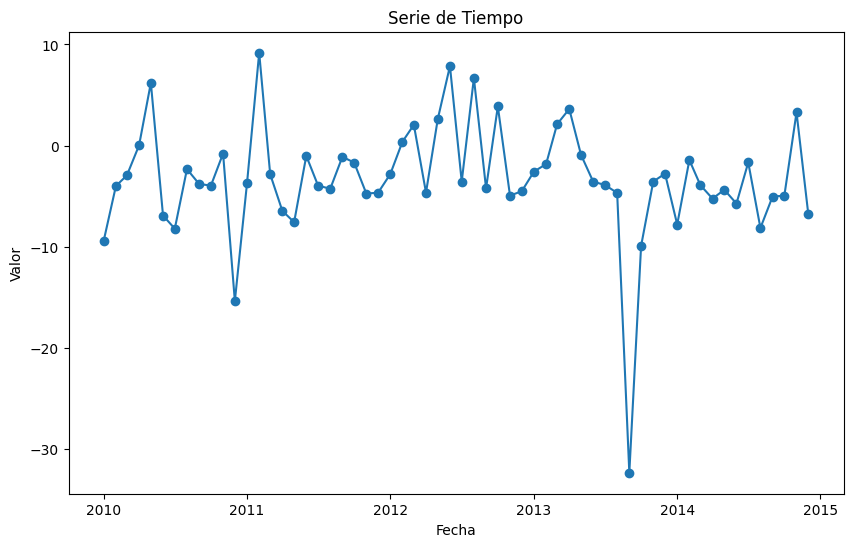

In [10]:
# Example usage:
serie_mensual = genera_serie_mensual(start=1, numObservations=60)
ver_serie_mensual(serie_mensual)

## Serie diaria

In [11]:
from datetime import datetime, timedelta

def genera_serie_diaria(start, numObservations, id=1):
    if start < 1 or start > 4014:
        raise ValueError("start must be an integer between 1 and 4014")
    if numObservations < 1:
        raise ValueError("numObservations must be a positive integer")
    if numObservations > 4015:
        raise ValueError("Only up to and including 2020.")
    if start + numObservations > 4016:
        raise ValueError("Incompatible start and observations")

    start_date = datetime(2010, 1, 1) + timedelta(days=start - 1)
    meses = []
    valores = []
    mean = np.random.normal(0, 5)
    scale = random.uniform(0, 10)

    for i in range(numObservations):
        current_date = start_date + timedelta(days=i)
        #print(f"{current_date.strftime('%d-%m-%Y')},{sample()}")
        meses.append(f"{current_date.strftime('%d-%m-%Y')}")
        valores.append(samplea_Laplace(mean, scale))
    return to_pd_df(np.array(meses), np.array(valores), id)

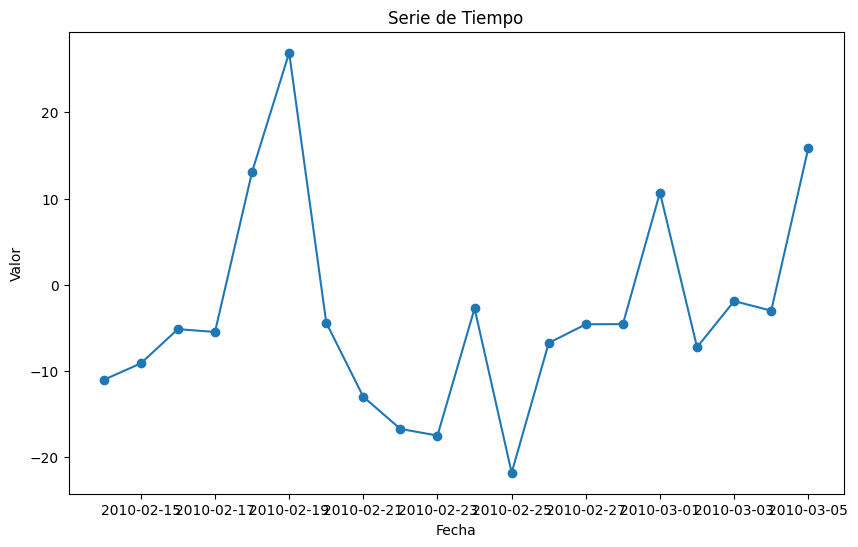

In [12]:
# Example usage
serie_diaria = genera_serie_diaria(start=45, numObservations=20)
#serie_diaria
ver_serie_diaria(serie_diaria)

## Genera 100 series y guardalas en un csv. (70 mensuales y 30 diarias)

In [13]:
todas_las_series = pd.DataFrame(columns=['Fecha', 'Valor', 'ID'])

for i in range(70):
  numObservations = random.randint(60, 132)
  start = random.randint(1, 131)
  while start + numObservations > 133:
    numObservations = random.randint(60, 132)
    start = random.randint(1, 132)
  serie_mensual = genera_serie_mensual(start, numObservations, id=i+1) # this is a dataframe
  todas_las_series = pd.concat([todas_las_series, serie_mensual], ignore_index=True)

for j in range(70,100):
  numObservations = random.randint(1825, 4015)
  start = random.randint(1, 4014)
  while start + numObservations > 4016:
    numObservations = random.randint(1825, 4015)
    start = random.randint(1, 4014)
  serie_diaria = genera_serie_diaria(start, numObservations, id=j+1) # this is a dataframe
  todas_las_series = pd.concat([todas_las_series, serie_diaria], ignore_index=True)

In [14]:
todas_las_series.shape

(75732, 3)

In [15]:
todas_las_series

,Fecha,Valor,ID
0,05-2010,3.128979,1
1,06-2010,6.807418,1
2,07-2010,13.265848,1
3,08-2010,-6.568003,1
4,09-2010,8.408616,1
...,...,...,...
75727,01-05-2017,-12.130650,100
75728,02-05-2017,0.081616,100
75729,03-05-2017,-13.110986,100
75730,04-05-2017,-2.231554,100


In [18]:
# Shuffle de los renglones del dataframe
todas_las_series = todas_las_series.sample(frac=1)
todas_las_series

,Fecha,Valor,ID
3419,03-2012,9.655049,41
53141,04-06-2018,-9.371645,90
3475,11-2016,-2.555031,41
59747,28-09-2011,-1.649223,94
65445,13-12-2013,6.999458,96
...,...,...,...
41349,17-11-2018,-9.529078,85
70019,13-09-2010,9.853023,98
36581,11-02-2015,-2.860527,83
19906,01-10-2017,11.577299,76


### Visualizacion

<ipython-input-21-be4c606622b6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m-%Y')


Serie de tiempo 13, con 82 observaciones.


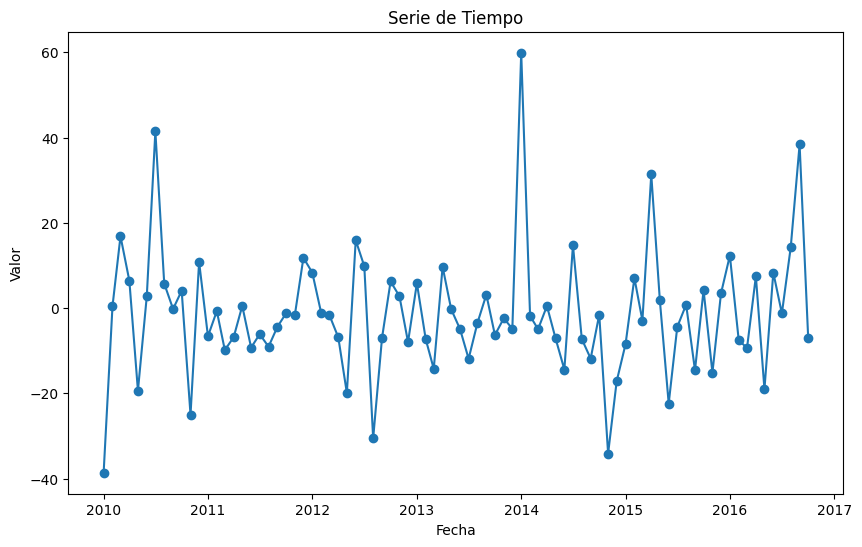

KeyboardInterrupt: 

In [21]:
import time
from IPython.display import clear_output

# Por cada serie en nuestro dataframe (id = n), visualizar.
for i in range(1,71):
  df = todas_las_series[todas_las_series['ID'] == i]
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%m-%Y')
  df = df.sort_values(by='Fecha')
  print(f'Serie de tiempo {i}, con {df.shape[0]} observaciones.')
  ver_serie_mensual(df)
  time.sleep(2)
  clear_output(wait=True)

<ipython-input-22-6eb9c13aacd6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y')


Serie de tiempo 74, con 1928 observaciones.


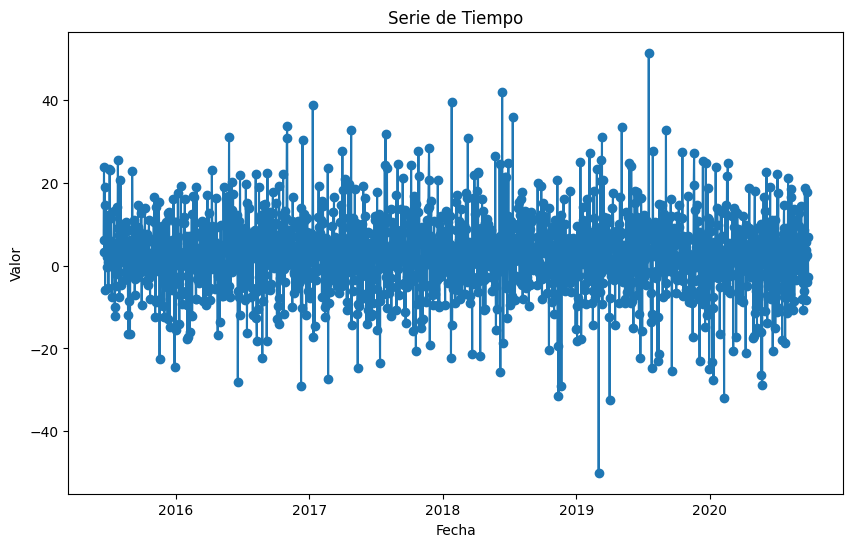

KeyboardInterrupt: 

In [22]:
for i in range(71,101):
  df = todas_las_series[todas_las_series['ID'] == i]
  df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d-%m-%Y')
  df = df.sort_values(by='Fecha')
  print(f'Serie de tiempo {i}, con {df.shape[0]} observaciones.')
  ver_serie_diaria(df)
  time.sleep(2)
  clear_output(wait=True)

In [23]:
from google.colab import files

todas_las_series.to_csv("100series.csv", index=False)
files.download("100series.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>